In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
artist_by_genre = pd.read_csv('archive/data_w_genres.csv')

In [3]:
artist_by_genre

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27616,鳳飛飛,0.884000,0.358000,259387.000000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,35.000000,10,1,2,"['c-pop', 'classic mandopop', 'vintage chinese..."
27617,黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,47.000000,9,0,2,"['c-pop', 'classic cantopop', 'classic mandopop']"
27618,黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,20.000000,5,1,11,[]
27619,黃蜀娟,0.925143,0.322262,212989.857143,0.141490,0.000189,0.196757,-19.256714,0.055571,111.685381,0.267033,23.000000,10,1,42,[]


Majore music genres from here: https://examples.yourdictionary.com/major-types-of-music-from-around-the-world.html

Country
Electronic dance music (EDM)
Hip-hop
Indie rock
Jazz
K-pop (Not)
Metal
Oldies
Pop
Rap
Rhythm & blues (R&B)
Rock
Classical

In [48]:
artist_by_genre.at[27616,'genres'].lower()

"['c-pop', 'classic mandopop', 'vintage chinese pop']"

In [49]:
filtered_genre = []

for index, row in artist_by_genre.iterrows():
    if row['genres'] == '[]':
        filtered_genre.append(None)
    else:
        if 'country' in row['genres'].lower():
            filtered_genre.append('Country')
        elif 'electronic' in row['genres'].lower():
            filtered_genre.append('EDM')
        elif 'dance' in row['genres'].lower():
            filtered_genre.append('EDM')
        elif 'edm' in row['genres'].lower():
            filtered_genre.append('EDM')
        elif 'hip hop' in row['genres'].lower():
            filtered_genre.append('Hip-hop')
        elif 'indie' in row['genres'].lower():
            filtered_genre.append('Indie')
        elif 'jazz' in row['genres'].lower():
            filtered_genre.append('Jazz')
        elif 'pop' in row['genres'].lower():
            filtered_genre.append('Pop')
        elif 'metal' in row['genres'].lower():
            filtered_genre.append('Metal')
        elif 'old' in row['genres'].lower():
            filtered_genre.append('Oldies')
        elif 'rap' in row['genres'].lower():
            filtered_genre.append('Rap')
        elif 'rhythm and blues' in row['genres'].lower():
            filtered_genre.append('R&B')
        elif 'rock' in row['genres'].lower():
            filtered_genre.append('Rock')
        elif 'classical' in row['genres'].lower():
            filtered_genre.append('Classical')   
        else:
            filtered_genre.append(None)

In [50]:
artist_by_genre['filtered_genre'] = filtered_genre

In [51]:
artist_by_valid_genre = artist_by_genre.dropna(subset=['filtered_genre'])

In [52]:
artist_by_valid_genre.to_csv('archive/artists_w_filtered_genres.csv')

In [53]:
print('NUMBER OF DISTINCT FILTERED GENRES: ', len(set(artist_by_valid_genre['filtered_genre'].tolist())))

NUMBER OF DISTINCT FILTERED GENRES:  12


In [54]:
list_genres = artist_by_valid_genre['filtered_genre'].tolist()
distinct_genres = set(list_genres)
genre_artist_count_dict = dict()

for genre in distinct_genres:
    genre_artist_count_dict[genre] = list_genres.count(genre)

In [55]:
genre_artist_count_dict_sorted = dict(sorted(genre_artist_count_dict.items(), reverse=True, key=lambda item: item[1]))

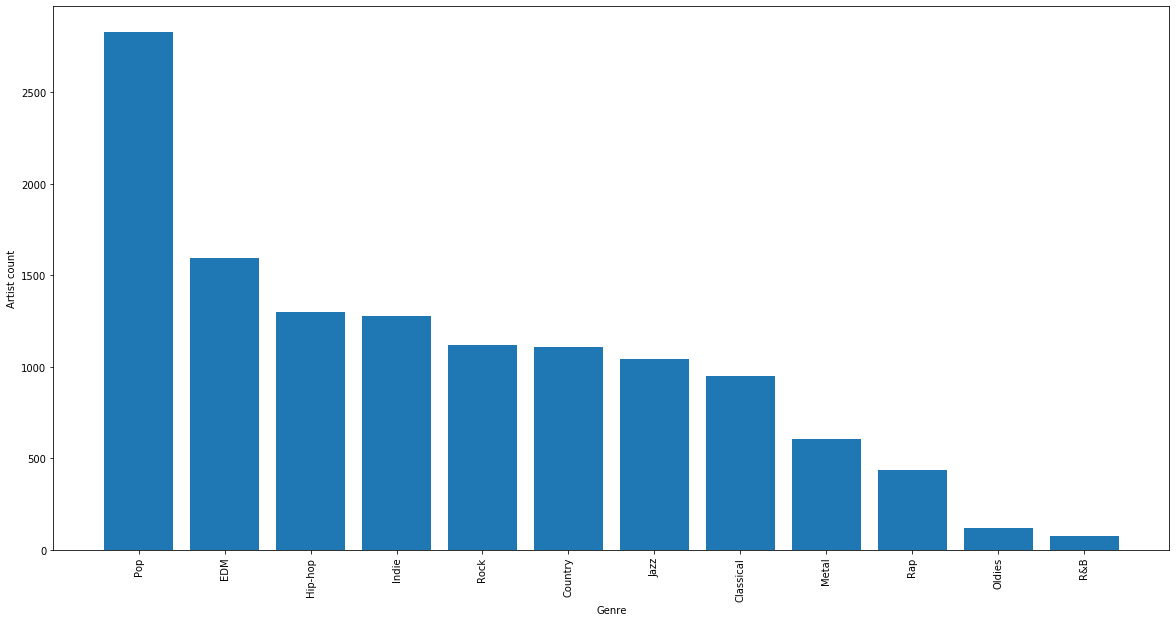

In [56]:
plt.figure(figsize=(20,10))
plt.bar(list(genre_artist_count_dict_sorted.keys()), list(genre_artist_count_dict_sorted.values()))
plt.xticks(rotation='vertical')
plt.ylabel('Artist count')
plt.xlabel('Genre')
plt.show()